In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
mortes_grupo_etario = pd.read_csv("data/morte_grupo_etario.csv", index_col=0)
mortes_grupo_etario

,Total,Menos de 01,01-04,05-09,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99,100 ou mais
Anos,,,,,,,,,,,,,,
1980,94794,3839,853,496,1387,1811,1938,4225,8806,16434,28787,22009,4141,68
1981,95728,3309,697,421,1509,2002,2012,4340,8973,16312,29028,22883,4156,86
1982,92379,2985,650,435,1386,1892,1961,3999,8625,15446,28575,22072,4266,87
1983,96179,2776,626,386,1293,1914,2083,3910,8925,15707,29485,24217,4748,109
1984,96975,2379,606,382,1211,1862,2037,3970,8909,15854,29667,25092,4911,95
1985,97085,2317,556,329,1127,1831,2001,3835,8660,15544,30051,25603,5148,83
1986,95521,2008,534,343,1093,1691,2012,3735,8674,15560,29156,25639,4990,86
1987,95102,1744,472,309,1102,1867,2115,3584,8223,15319,28641,26403,5199,124
1988,97844,1584,481,267,1114,1872,2120,3627,8170,16070,28775,27943,5699,122


<AxesSubplot:title={'center':'Número de Mortes por grupo Etario - Media 30 anos'}>

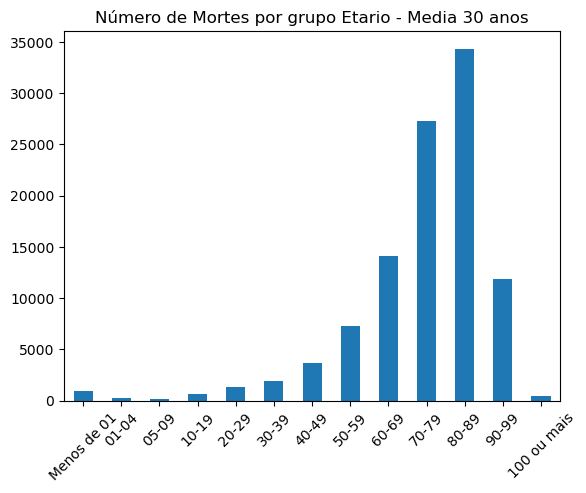

In [14]:
mortes_grupo_etario.mean().drop('Total').plot.bar(title="Número de Mortes por grupo Etario - Media 30 anos", rot = 45)

<AxesSubplot:title={'center':'Número de Mortes por grupo Etario - Media 30 anos'}>

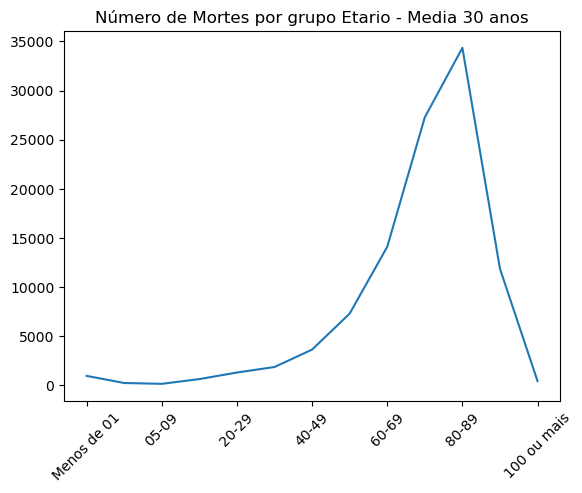

In [26]:
mortes_grupo_etario.mean().drop('Total').plot.line(title="Número de Mortes por grupo Etario - Media 30 anos", rot = 45)

In [28]:
intervalo_idades  = mortes_grupo_etario.mean().drop('Total').index
idades = []
for intervalo in intervalo_idades:
    if 'Menos' in intervalo:
        idades.append(1)
    elif 'mais' in intervalo:
        idades.append(100)
    else:
        menor, maior = intervalo.split('-')
        idade = 0.5*int(maior) + 0.5*int(menor)
        idades.append(idade)
idades

[1, 2.5, 7.0, 14.5, 24.5, 34.5, 44.5, 54.5, 64.5, 74.5, 84.5, 94.5, 100]

In [34]:
probability_dead = list(mortes_grupo_etario.mean().drop('Total').values / mortes_grupo_etario.mean()['Total'])
probability_dead

[0.009343999093649446,
 0.002401098036385132,
 0.0016018740990457509,
 0.00621562783163168,
 0.012624266302603677,
 0.018019199190862853,
 0.035019210840025704,
 0.07012567619393069,
 0.13534568433920807,
 0.2616945603206215,
 0.32945614170133053,
 0.11385046632055708,
 0.00423618380734386]

In [36]:
from random import random
from bisect import bisect

def weighted_choice(choices):
    values, weights = zip(*choices)
    total = 0
    cum_weights = []
    for w in weights:
        total += w
        cum_weights.append(total)
    x = random() * total
    i = bisect(cum_weights, x)
    return values[i]
choices = [(age, prob) for age, prob in zip(idades, probability_dead)]
weighted_choice(choices)

74.5

In [53]:
import random
test_dist = [random.choices(idades, weights=probability_dead)[0] for _ in range(10000)]
test_dist

[74.5,
 74.5,
 64.5,
 84.5,
 74.5,
 94.5,
 64.5,
 84.5,
 84.5,
 74.5,
 84.5,
 84.5,
 84.5,
 74.5,
 74.5,
 84.5,
 94.5,
 54.5,
 74.5,
 74.5,
 94.5,
 84.5,
 64.5,
 74.5,
 84.5,
 74.5,
 74.5,
 74.5,
 84.5,
 94.5,
 44.5,
 84.5,
 74.5,
 84.5,
 74.5,
 84.5,
 94.5,
 74.5,
 84.5,
 54.5,
 44.5,
 74.5,
 84.5,
 44.5,
 84.5,
 44.5,
 84.5,
 74.5,
 84.5,
 84.5,
 74.5,
 84.5,
 74.5,
 74.5,
 84.5,
 84.5,
 74.5,
 84.5,
 84.5,
 84.5,
 84.5,
 54.5,
 94.5,
 54.5,
 74.5,
 64.5,
 84.5,
 74.5,
 84.5,
 84.5,
 94.5,
 44.5,
 94.5,
 84.5,
 84.5,
 84.5,
 64.5,
 74.5,
 74.5,
 84.5,
 74.5,
 64.5,
 84.5,
 34.5,
 84.5,
 84.5,
 54.5,
 94.5,
 84.5,
 84.5,
 94.5,
 54.5,
 84.5,
 74.5,
 64.5,
 54.5,
 74.5,
 24.5,
 54.5,
 84.5,
 84.5,
 74.5,
 74.5,
 64.5,
 74.5,
 44.5,
 54.5,
 74.5,
 84.5,
 84.5,
 74.5,
 74.5,
 54.5,
 94.5,
 84.5,
 84.5,
 64.5,
 84.5,
 74.5,
 44.5,
 94.5,
 74.5,
 84.5,
 64.5,
 84.5,
 84.5,
 74.5,
 74.5,
 74.5,
 74.5,
 84.5,
 84.5,
 84.5,
 84.5,
 54.5,
 84.5,
 64.5,
 84.5,
 54.5,
 84.5,
 74.5,
 94.5,
 74.5,

Text(0.5, 1.0, 'Test sample function')

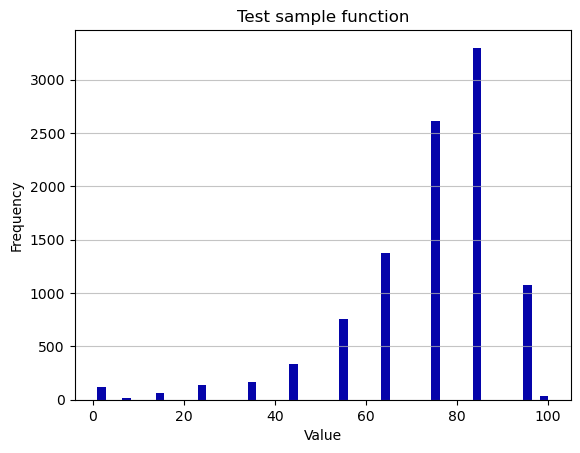

In [54]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=test_dist, bins='auto', color='#0504aa')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Test sample function')
#maxfreq = n.max()
# Set a clean upper y-axis limit.
#plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

In [45]:
pop_sexo = pd.read_csv("data/pop_sexo.csv", index_col=0)
pop_sexo

,Total,Masculino,Feminino
Anos,,,
1960,8865.0,4245.0,4620.0
1961,8929.0,4274.0,4655.0
1962,8994.0,4304.5,4689.5
1963,9030.5,4322.0,4708.5
1964,9035.5,4318.0,4717.5
...,...,...,...
2017,10300.3,4875.1,5425.2
2018,10283.8,4860.0,5423.8
2019,10286.3,4856.2,5430.1


In [46]:
pop_sexo.mean()

Total        9825.925806
Masculino    4705.359677
Feminino     5120.570968
dtype: float64

In [49]:
probability_sexo = pop_sexo.mean().drop('Total').values / pop_sexo.mean()['Total']
list(probability_sexo)

[0.47887189157584076, 0.5211286008672906]

In [55]:
escolaridade = pd.read_csv("data/escolaridade.csv")
escolaridade

,SEXO,Total,Nenhum,Ensino básico,1º ciclo,2º ciclo,3º ciclo,Ensino secundário e pós secundário,Ensino superior
0,HM,10344802,1418682,4926768,2215659,1110402,1600707,2199251,1800101
1,H,4921170,645100,2463572,1010397,601883,851292,1091850,720648
2,M,5423632,773582,2463196,1205262,508519,749415,1107401,1079453


In [57]:
mask = (escolaridade['SEXO'] == 'H') | (escolaridade['SEXO'] == 'M')
escolaridade = escolaridade[mask].copy()

,SEXO,Total,Nenhum,Ensino básico,1º ciclo,2º ciclo,3º ciclo,Ensino secundário e pós secundário,Ensino superior
1,H,4921170,645100,2463572,1010397,601883,851292,1091850,720648
2,M,5423632,773582,2463196,1205262,508519,749415,1107401,1079453


In [64]:
escolaridade[mask_homem]['Total'].iloc[0]

4921170

In [71]:
mask_homem = (escolaridade['SEXO'] == 'M')

probability_escolaridade_homem = escolaridade[mask_homem].drop(['Total', 'SEXO'], axis=1) / escolaridade[mask_homem]['Total'].iloc[0]
probability_escolaridade_homem

,Nenhum,Ensino básico,1º ciclo,2º ciclo,3º ciclo,Ensino secundário e pós secundário,Ensino superior
2,0.142632,0.45416,0.222224,0.09376,0.138176,0.204181,0.199028


In [263]:
list(probability_escolaridade_homem.values)

[array([0.14263173, 0.45415987, 0.22222415, 0.09375986, 0.13817586,
        0.2041807 , 0.1990277 ])]

In [264]:
sum([0.14263173, 0.45415987,
     0.2041807 , 0.1990277 ])

1.0

In [72]:
SCHOOL_LEVELS = probability_escolaridade_homem.columns
list(probability_escolaridade_homem.values)

[array([0.14263173, 0.45415987, 0.22222415, 0.09375986, 0.13817586,
        0.2041807 , 0.1990277 ])]

In [106]:
rendimento_por_escolaridade = pd.read_csv('data/rendimento_por_escolaridade.csv',index_col=0)
rendimento_por_escolaridade
rendimento_por_escolaridade_2021 = pd.read_csv('data/rendimento_por_escolaridade_2021.csv',index_col=0)
rendimento_por_escolaridade_2021

,Da educação pré-escolar ao ensino básico (ISCED 02-2),Do ensino secundário ao ensino pós-secundário (ISCED 3-4),Ensino superior (ISCED 5-8)
Anos,,,
2004,7549,11804,19123
2005,7900,12449,21013
2006,8048,12421,20956
2007,8455,12707,21341
2008,8975,12489,20728
2009,8908,12719,20724
2010,9200,12403,20180
2011,8973,11922,19901
2012,9043,11536,18453


In [267]:
rendimento_por_escolaridade_2021.iloc[13:,:].mean().to_dict()

{'Da educação pré-escolar ao ensino básico (ISCED 02-2)': 9671.8,
 'Do ensino secundário ao ensino pós-secundário (ISCED 3-4)': 12245.6,
 'Ensino superior (ISCED 5-8)': 18412.4}

In [103]:
rendimento_por_escolaridade['Superior']

ano
2010    1951.9
2011    1931.9
2012    1907.1
2013    1872.1
2014    1840.8
2015    1819.4
2016    1814.8
2017    1822.6
2018    1853.3
2019    1887.5
Name: Superior, dtype: float64

In [120]:
2004+12

2016

<AxesSubplot:xlabel='Anos'>

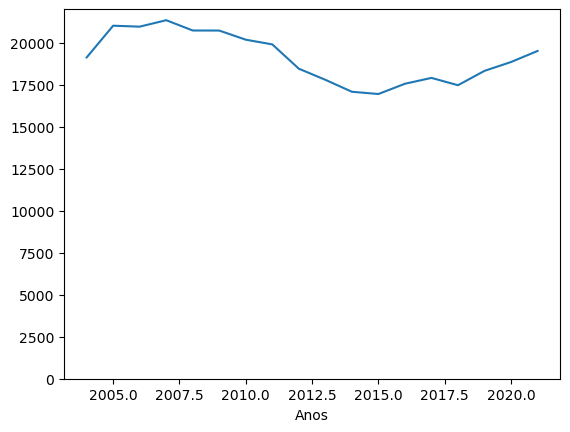

In [108]:
rendimento_por_escolaridade_2021['Ensino superior (ISCED 5-8)'].plot(x = 'ano',ylim=(0,22000))

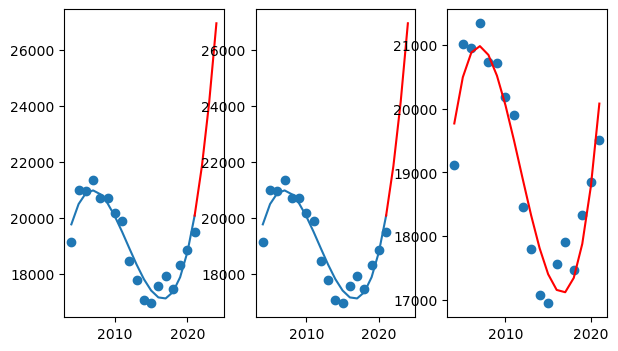

In [114]:
x = rendimento_por_escolaridade_2021.index
y = rendimento_por_escolaridade_2021['Ensino superior (ISCED 5-8)']


DATA_START = 2004
DATA_END = 2022
DATA_PREDICTION = 2025

DEGREE = 3

mymodel = np.poly1d(np.polyfit(x, y, DEGREE))
myline = np.arange(DATA_START,DATA_END)

fig, (ax, ax1, ax2) = plt.subplots(nrows=1,ncols=3, figsize=(7,4))
ax.scatter(x, y)
ax.plot(myline, mymodel(myline))
myline = np.arange(DATA_END -1,DATA_PREDICTION)
ax.plot(myline, mymodel(myline), color='red')


mymodel = np.poly1d(np.polyfit(x, y, DEGREE))
myline = np.arange(DATA_START,DATA_END)
ax1.scatter(x, y)
ax1.plot(myline, mymodel(myline))
myline = np.arange(DATA_END -1,DATA_PREDICTION)
ax1.plot(myline, mymodel(myline), color='red')

mymodel = np.poly1d(np.polyfit(x, y, DEGREE))
myline = np.arange(DATA_START,DATA_END)
ax2.scatter(x, y)
ax2.plot(myline, mymodel(myline), color='red')
plt.show()

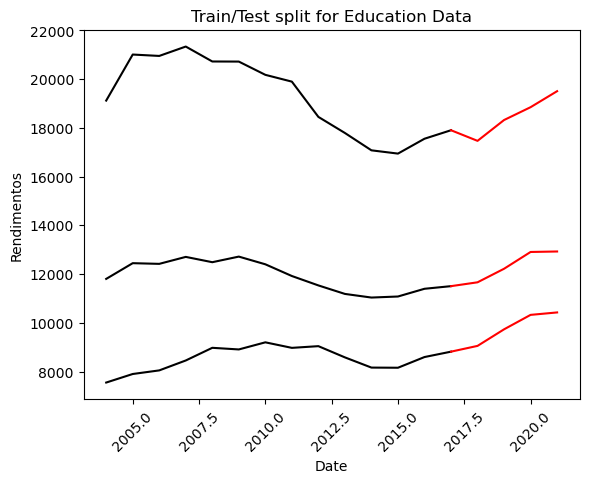

In [131]:
train = rendimento_por_escolaridade_2021[rendimento_por_escolaridade_2021.index <= 2017]
test = rendimento_por_escolaridade_2021[rendimento_por_escolaridade_2021.index >= 2017]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('Rendimentos')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Education Data")
plt.show()

In [124]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [125]:
y = train['Ensino superior (ISCED 5-8)']

In [126]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))

/home/tiago/anaconda3/envs/workspace/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/tiago/anaconda3/envs/workspace/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [127]:
ARMAmodel = ARMAmodel.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.24986D+00    |proj g|=  1.59783D+00

At iterate    5    f=  8.57732D+00    |proj g|=  1.47386D-01

At iterate   10    f=  8.44039D+00    |proj g|=  5.01497D-02

At iterate   15    f=  8.40888D+00    |proj g|=  6.14607D-03

At iterate   20    f=  8.29094D+00    |proj g|=  1.22674D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     27      1     0     0   6.582D-05   8.291D+00
  F =   8.2909152957446075     

CONVERG

 This problem is unconstrained.


In [128]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

/home/tiago/anaconda3/envs/workspace/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/tiago/anaconda3/envs/workspace/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


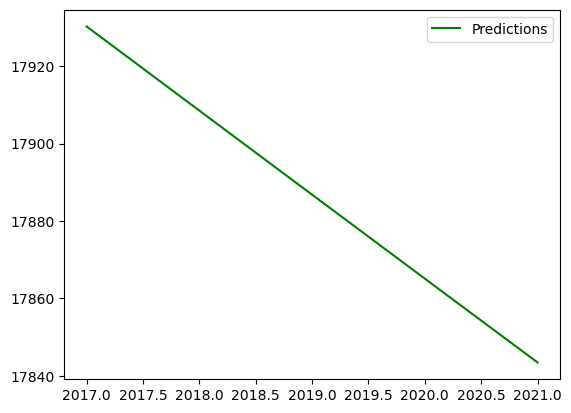

In [129]:
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

In [133]:
casais_por_numero_filhos = pd.read_csv('data/casais_por_numero_filhos.csv')
casais_por_numero_filhos

,Total,Sem filhos,1 filho,2 filhos,3 e mais filhos
0,3069745,975252,1121103,760565,212825


/home/tiago/anaconda3/envs/workspace/lib/python3.10/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


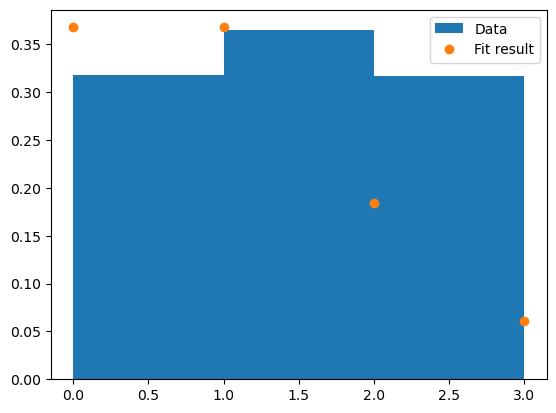

In [173]:
data_hist = [0]* 975252 + [1]*1121103 + [2]*760565 + [3]* 212825

from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson

# get poisson deviated random numbers
data = data_hist

# the bins should be of integer width, because poisson is an integer distribution
bins = np.arange(4)
entries, bin_edges, patches = plt.hist(data, bins=bins, density=True, label='Data')

# calculate bin centres
bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])


def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)


# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, bin_middles, entries)

# plot poisson-deviation with fitted parameter
x_plot = np.arange(4)

plt.plot(
    x_plot,
    fit_function(x_plot, *parameters),
    marker='o', linestyle='',
    label='Fit result',
)
plt.legend()
plt.show()

<AxesSubplot:>

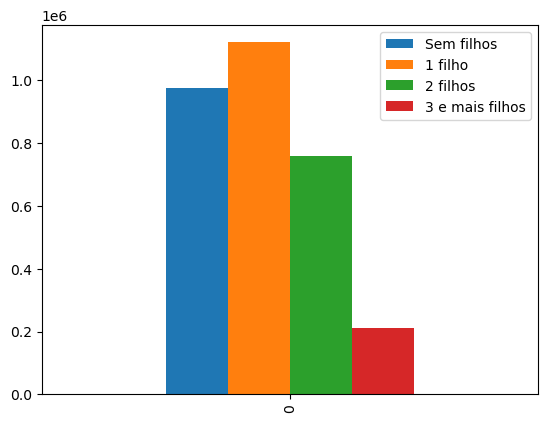

In [135]:
casais_por_numero_filhos.drop('Total', axis=1).plot.bar()

In [157]:
list(0/ 3069745)

[0.31769804983801586,
 0.36521046536438695,
 0.2477616218936752,
 0.06932986290392198]

/home/tiago/anaconda3/envs/workspace/lib/python3.10/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


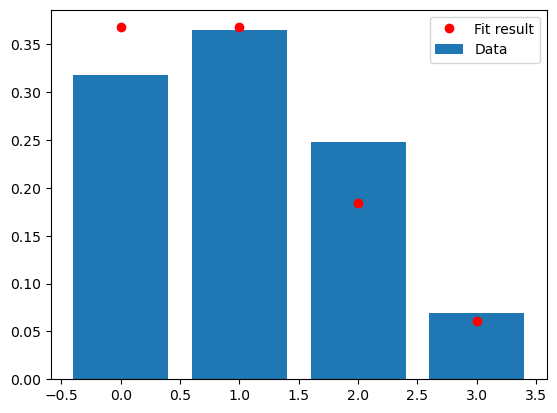

In [168]:
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson

# get poisson deviated random numbers
data = list(casais_por_numero_filhos.drop('Total', axis=1).T[0] / 3069745)

# the bins should be of integer width, because poisson is an integer distribution
bins = np.arange(4)
plt.bar(bins,data, label='Data')

# calculate bin centres
#bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])


def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)


# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, data, bins)

# plot poisson-deviation with fitted parameter
x_plot = np.arange(4)

plt.plot(
    x_plot,
    fit_function(x_plot, *parameters),
    marker='o', linestyle='',
    label='Fit result', color='red'
)
plt.legend()

In [165]:
fit_function(x_plot, *parameters)

array([0.36787944, 0.36787944, 0.18393972])

In [179]:
NUMBER_CHILDS = [0,1,2,3]
PROBABILITY_NUMBER_CHILDS = list(casais_por_numero_filhos.drop('Total', axis=1).T[0] / 3069745)
genereted_data = [random.choices(NUMBER_CHILDS, weights=PROBABILITY_NUMBER_CHILDS)[0] for _ in range(3069745)]


In [181]:
PROBABILITY_NUMBER_CHILDS = [0.31769804983801586,
                             0.36521046536438695,
                             0.2477616218936752,
                             0.06932986290392198]

[0.31769804983801586,
 0.36521046536438695,
 0.2477616218936752,
 0.06932986290392198]

<AxesSubplot:>

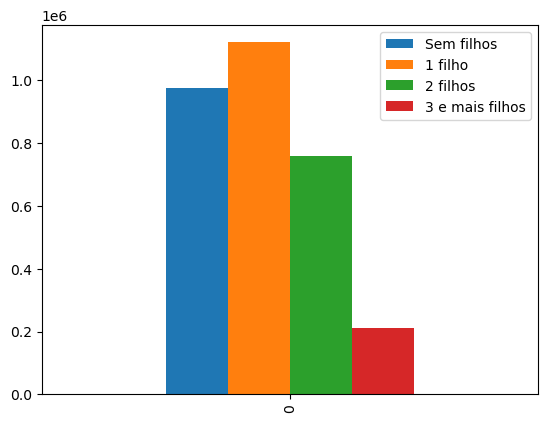

In [177]:
casais_por_numero_filhos.drop('Total', axis=1).plot.bar()

(array([ 974568.,       0.,       0., 1121952.,       0.,       0.,
         760621.,       0.,       0.,  212604.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

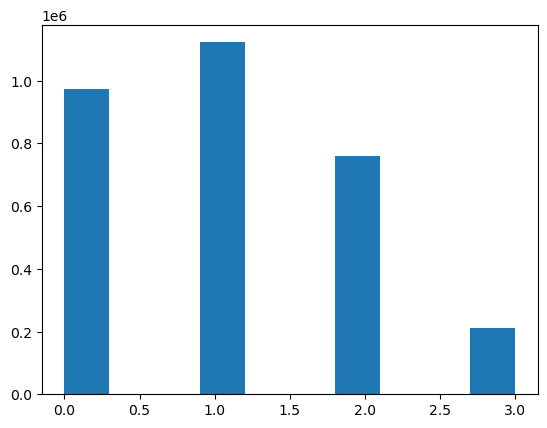

In [180]:
plt.hist(genereted_data)

In [183]:
np.random.exponential(3,1000000)

array([5.05703234, 3.23618417, 0.77581875, ..., 5.03974897, 3.42581389,
       1.47062687])

(array([7.36594e+05, 1.94086e+05, 5.10370e+04, 1.34960e+04, 3.08300e+03,
        1.23700e+03, 3.49000e+02, 8.40000e+01, 2.40000e+01, 1.00000e+01]),
 array([ 0. ,  3.8,  7.6, 11.4, 15.2, 19. , 22.8, 26.6, 30.4, 34.2, 38. ]),
 <BarContainer object of 10 artists>)

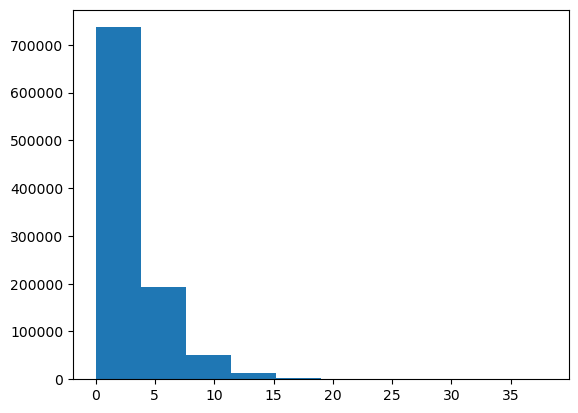

In [184]:
plt.hist([int(i) for i in np.random.exponential(3,1000000)])

AttributeError: 'Rectangle' object has no property 'normed'

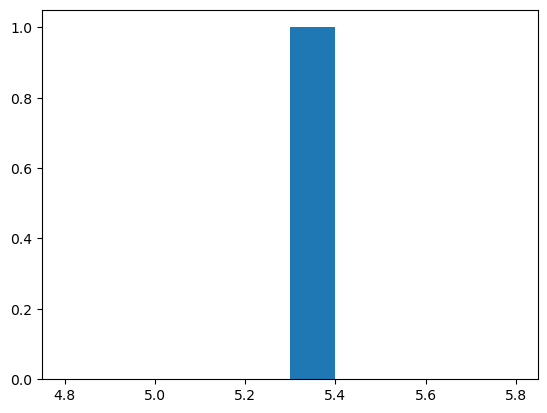

In [194]:
import scipy.stats as stats
lower, upper, scale = 3, 16, 1/0.5
X = stats.truncexpon(b=(upper-lower)/scale, loc=lower, scale=scale)
data = X.rvs(1)

fig, ax = plt.subplots()
ax.hist(data, normed=True)
plt.show()

In [195]:
data

array([5.29912197])

In [198]:
from scipy.stats import truncnorm
a, b = 15, 49

mean, var, skew, kurt = truncnorm.stats(a, b, moments='mvsk')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


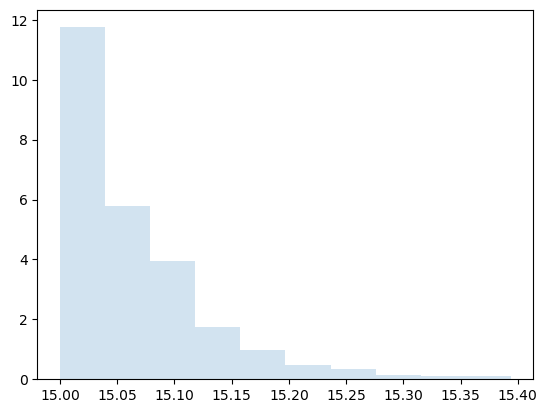

In [200]:
r = truncnorm.rvs(a, b, size=1000)
fig, ax = plt.subplots(1, 1)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)

ax.legend(loc='best', frameon=False)

plt.show()

In [210]:
from scipy.stats import poisson, uniform
sample_size = 3_000_000
maxval = 49
mu = 26.8

cutoff = poisson.cdf(maxval, mu)
# generate uniform distribution [0, cutoff):
u = uniform.rvs(scale=cutoff, size=sample_size)
# convert to Poisson:
truncated_poisson = poisson.ppf(u, mu)
print(truncated_poisson)

[38. 28. 35. ... 24. 34. 36.]


(array([5.42000e+02, 1.47680e+04, 1.28572e+05, 6.59765e+05, 8.94856e+05,
        7.60353e+05, 4.35157e+05, 8.68990e+04, 1.67850e+04, 2.30300e+03]),
 array([ 6. , 10.3, 14.6, 18.9, 23.2, 27.5, 31.8, 36.1, 40.4, 44.7, 49. ]),
 <BarContainer object of 10 artists>)

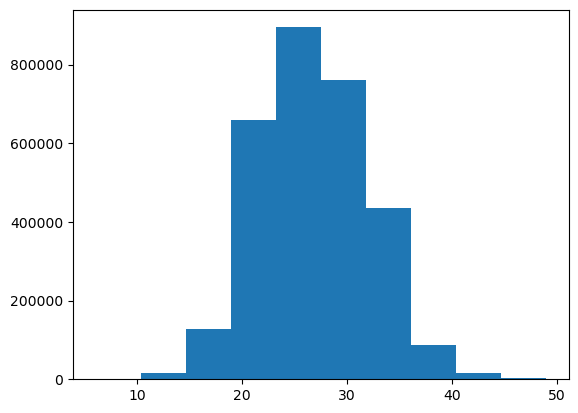

In [211]:
plt.hist(truncated_poisson)

In [213]:
np.std(truncated_poisson)

5.172331674747173

In [231]:
age = 28
lower, upper, scale = age, 49, 1/.25
X = stats.truncexpon(b=(upper-lower)/scale, loc=lower, scale=scale)
list_aux = sorted( [int(i) for i in X.rvs(1_000_000)])
sorted(random.sample(set(list_aux), 10))


/tmp/ipykernel_1325711/2410539812.py:5: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sorted(random.sample(set(list_aux), 10))


[29, 30, 31, 32, 34, 40, 41, 43, 44, 45]

In [227]:
list_aux

array([34.08262577, 29.61224586, 30.26169104, ..., 34.59474907,
       29.42098602, 35.87499008])

In [232]:
populacao_estado_civil = pd.read_csv('data/populacao_estado_civil.csv', index_col=0)
populacao_estado_civil

,Total,Solteiros,Casados,Viúvos,Divorciados
Anos,,,,,
1960,8889392,4690088.0,3692779,485245.0,21280.0
1970,8611120,4218645.0,3889925,486320.0,16230.0
1981,9833014,4341301.0,4890843,557552.0,43318.0
1991,9867147,NaN,4937011,NaN,NaN
2001,10356117,NaN,5214650,NaN,NaN
2011,10562178,4272977.0,4924870,770664.0,593667.0
2021,10344802,4485469.0,4250772,780326.0,828235.0


In [241]:
populacao_estado_civil.iloc[4:7,:].mean()/populacao_estado_civil.iloc[4:7,:].mean()['Total']

Total          1.000000
Solteiros      0.420229
Casados        0.460296
Viúvos         0.074416
Divorciados    0.068223
dtype: float64

In [243]:
populacao_estado_civil.iloc[4:7,:].mean()/populacao_estado_civil.iloc[4:7,:].mean()['Total']

Total          1.000000
Solteiros      0.420229
Casados        0.460296
Viúvos         0.074416
Divorciados    0.068223
dtype: float64

In [244]:
1 - 0.460296

0.539704

In [250]:
sample_size = 2
maxval = 49
mu = 26.8 # mean age of first child in 2001
cutoff = poisson.cdf(maxval, mu)
# generate uniform distribution [0, cutoff):
age_first_child = uniform.rvs(scale=cutoff, size=sample_size)
print(f"Age first Child: {age_first_child}")

Age first Child: [0.7010426 0.3997794]


In [252]:
random.gauss(mu, sigma=10)

25.27100519145792

In [259]:
age = 0
while age < 15 or age > 49:
    age = random.gauss(mu, sigma=10)
age

31.67766376853121

In [254]:
age

30.416985390781672

### Destribuiçao Salarios 2021

In [297]:
salarios = [600*14, 800*14, 1000*14, 1500*14, 2000*14, 3000*14, 4000*14, 5000*14]
homens = [68539, 1003415, 391572,355864,141452,122314, 42684,38225]
mulheres = [74853,10358881, 256389,282244,11722,76855,23098,14302]

In [298]:
salarios

[8400, 11200, 14000, 21000, 28000, 42000, 56000, 70000]

In [299]:
salarios_homens = []
for salario, numero in zip(salarios, homens):
    salarios_homens += [salario] * numero

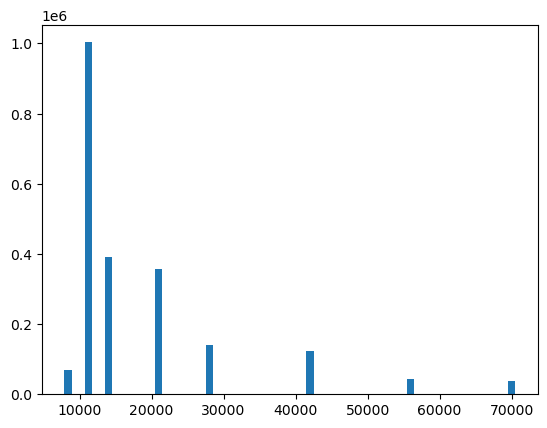

In [301]:
plt.figure()
plt.bar(salarios, homens, data='Ho', width=1000)
plt.show()

(array([1463526.,       0.,  355864.,  141452.,       0.,  122314.,
              0.,   42684.,       0.,   38225.]),
 array([ 600., 1040., 1480., 1920., 2360., 2800., 3240., 3680., 4120.,
        4560., 5000.]),
 <BarContainer object of 10 artists>)

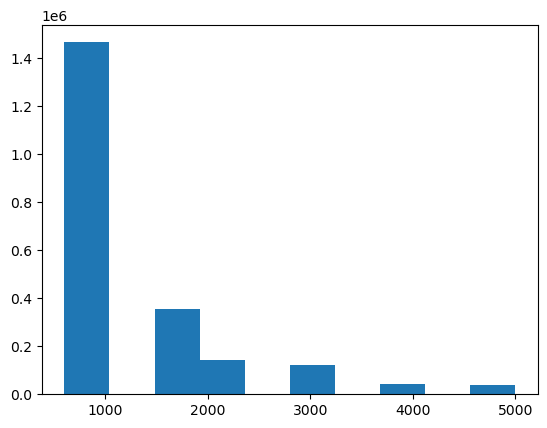

In [294]:
plt.hist(salarios_homens)

In [302]:
np.mean(salarios_homens)

17990.691407143502

In [303]:
np.std(salarios_homens)

12002.907068321432

In [314]:
array = np.zeros(100_000)
for index, _ in enumerate(array):
    array[index]= random.gauss(18412.4, 12002.907068321432/4)

In [315]:
array.mean()

18400.70747970786

In [316]:
array.max()

31919.18501179843

In [317]:
array.min()

5126.8393680447825

In [318]:
array.min() / 14

366.20281200319874

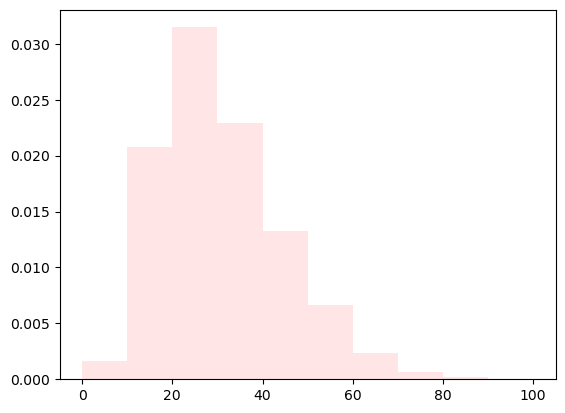

In [333]:
from scipy.stats import skewnorm
numValues = 10000
maxValue = 100
skewness = 5   #Negative values are left skewed, positive values are right skewed.

random = skewnorm.rvs(a = skewness,loc=maxValue, size=numValues)  #Skewnorm function

random = random - min(random)      #Shift the set so the minimum value is equal to zero.
random = random / max(random)      #Standadize all the vlues between 0 and 1.
random = random * maxValue         #Multiply the standardized values by the maximum value.

#Plot histogram to check skewness
plt.hist(random,density=True, color = 'red', alpha=0.1)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


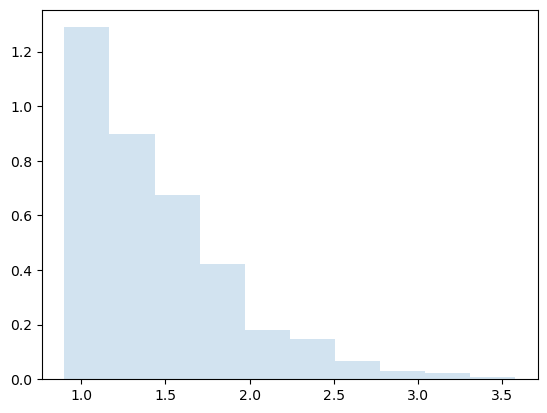

In [338]:
myclip_a = 0.9
myclip_b = 2.5
loc = 1
a, b = (myclip_a - loc) / scale, (myclip_b - loc) / scale
fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = truncnorm.stats(a, b, moments='mvsk')
a = 0.9
b = 5
r = truncnorm.rvs(a, b, size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)

ax.legend(loc='best', frameon=False)

plt.show()

In [345]:
truncnorm.rvs(a, b, size=1)[0]

1.3632778562245091

In [350]:
escalao_irs = pd.read_csv("data/escalao_irs.csv")
escalao_irs

,Escalão,Rendimento coletável,Unnamed: 2,Taxa média
0,1.º,0,14.5,"14,50%"
1,2.º,7116,23.0,"17,37%"
2,3.º,10736,26.5,"20,06%"
3,4.º,15216,28.5,"21,98%"
4,5.º,19696,35.0,"24,77%"
5,6.º,25076,37.0,"28,66%"
6,7.º,36757,43.5,"32,00%"
7,8.º,48033,45.0,"36,77%"
8,9.º,75009,48.0,NaN


In [345]:
def IRS_amount(salary):
    if salary < 7116:

In [351]:
705*14

9870